# Lab Exercise 6: Exploring the ERA5 Dataset

### Task 1: Exploring the dataset contents.

Let's start by investigating the dataset structure. Your dataset `era5_philippines_2009_09_27.nc` includes multiple variables with three primary dimensions (`valid_time`, `latitude`, and `longitude`).

1. Examine the Variables: Identify the variable names, their dimensions, and other details from the dataset output.
2. Research Variable Descriptions: Use the [ERA5 data documentation](https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation) to understand what each variable represents. 

Install the xarray and netCDF4 package (if not present)

```bash
!conda install -c conda-forge xarray netCDF4 --name meteo203 -y
```

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import pandas as pd


# Load the netCDF file
file_path = 'era5_philippines_2009_09_27.nc'
data = xr.open_dataset(file_path)

# Display dataset information
data

<xarray.Dataset> Size: 2MB
Dimensions:     (valid_time: 4, latitude: 121, longitude: 241)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 32B 2009-09-27 ... 2009-09-27T18:...
  * latitude    (latitude) float64 968B 30.0 29.75 29.5 29.25 ... 0.5 0.25 0.0
  * longitude   (longitude) float64 2kB 110.0 110.2 110.5 ... 169.5 169.8 170.0
    number      int64 8B ...
    expver      (valid_time) <U4 64B ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 467kB ...
    msl         (valid_time, latitude, longitude) float32 467kB ...
    u10         (valid_time, latitude, longitude) float32 467kB ...
    v10         (valid_time, latitude, longitude) float32 467kB ...
    tp          (valid_time, latitude, longitude) float32 467kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-18T18:39 GRIB to CDM+CF via cfgrib-0.9.1...

#### Questions

1. What are the primary dimensions (temporal, spatial) of this dataset?
2. How many elements are there for each dimension?
3. What do each of the variables represent? Hint: look for the keyword `GRIB Name`
4. How often is the data recorded?
5. What is is the extent (`latitude`, `longitude`) of this dataset? Describe in terms of minimum and maximum latitude and longitude.

1. The dataset is comprised of 6-hourly data for 2009-09-27 (temporal) across latitude and longitude coordinates (spatial).
2. Each dimension has the following:
   - valid_time: 4 elements
   - latitude: 121 elements
   - longitude: 241 elements
4. 
   - t2m: 2-m temperature
   - msl: mean sea level pressure
   - u10: 10-m u component of wind
   - v10: 10-m v component of wind
   - tp: total precipitation
5. The data is recorded every 6 hours.
6. The latitude ranges from 0 to 30, while the longitude ranges from 110 to 170.

---

### Task 2: Slicing gridded data by index. 

The next step in our lab exercise is to calculate descriptive statistics and visualize the `t2m` (2-meter temperature) variable, which represents the air temperature close to the ground.

The structure of netCDF files is slightly different from HDF5 files, although both are commonly used for gridded scientific data. netCDF files, often used in atmospheric and climate sciences, are organized by dimensions, variables, and metadata:

1. Dimensions: These are the axes of the data (e.g., latitude, longitude, time). Each variable is defined over one or more dimensions.
2. Variables: These contain the actual data values. Each variable (like `t2m`) is associated with one or more dimensions.
3. Attributes: Metadata that describes each variable and the dataset as a whole.

In this task, we’ll perform basic statistics on `t2m` for a time slice and create a plot. This process includes calculating the mean, minimum, and maximum temperature over the dataset's time and spatial dimensions. 

We can easily [slice a subset of the data](https://www.w3schools.com/python/numpy/numpy_array_slicing.asp) as follows

```python
data[i, j ,k]
```

where `i`, `j`, and `k` are the index elements.


Consider the dimensions below for the subset `data['t2m']`
```python
(valid_time: 4, latitude: 121, longitude: 241)
```

We can take the ith time step, jth latitude, and kth longitude using the following 

```python
data['t2m'][i, j ,k]
```

In the code block below, access the `t2m` variable, and then slice according to i. Calculate the basic descriptive statistics (mean, min, max, median). Plot the data in a separate code block. 

We'll slice according to latitude and longitude in the next task.

In [2]:
# Access the 't2m' variable for index i
t2m_slice = data['t2m'][1]
time =  data['valid_time'][1].values
time_str = pd.to_datetime(time).strftime('%Y-%m-%d %H:%M')

# Calculate descriptive statistics
mean_t2m = t2m_slice.mean().values
min_t2m = t2m_slice.min().values
max_t2m =  t2m_slice.max().values

print(f"Mean 2m Temperature: {mean_t2m:.2f} K")
print(f"Min 2m Temperature: {min_t2m:.2f} K")
print(f"Max 2m Temperature: {max_t2m:.2f} K")

Mean 2m Temperature: 300.85 K
Min 2m Temperature: 289.85 K
Max 2m Temperature: 309.27 K


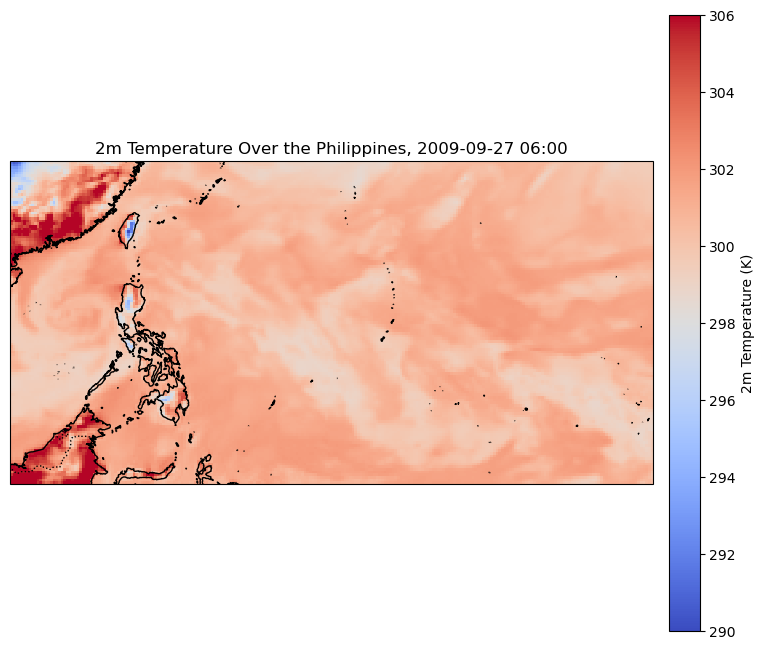

In [3]:
# plotting t2m_slice
# Set up the figure and map projection
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# ax.set_extent([121.5, 122, 15.5, 16], crs=ccrs.PlateCarree()) 
# Add coastlines and gridlines
ax.coastlines(resolution="10m", linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the temperature data
temperature_plot = ax.pcolormesh(data['longitude'], data['latitude'], t2m_slice, 
                                 cmap='coolwarm', shading='auto', transform=ccrs.PlateCarree(),
                                 vmin=290, vmax=306)
plt.colorbar(temperature_plot, orientation='vertical', pad=0.02, label='2m Temperature (K)')
plt.title(f"2m Temperature Over the Philippines, {time_str}")

plt.show()

Mean 2m Temperature: 300.52 K
Min 2m Temperature: 289.72 K
Max 2m Temperature: 306.00 K


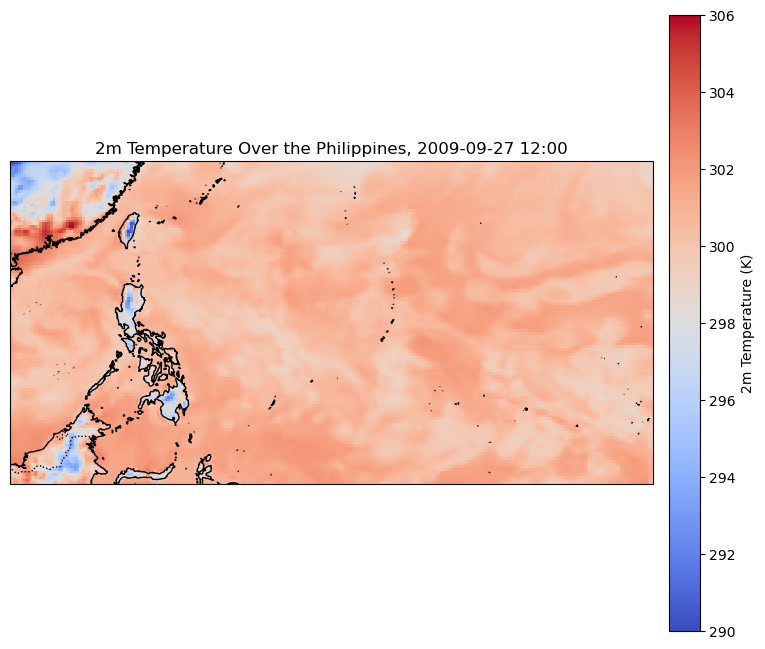

In [4]:
# Access the 't2m' variable for index i
t2m_slice = data['t2m'][2]
time =  data['valid_time'][2].values
time_str = pd.to_datetime(time).strftime('%Y-%m-%d %H:%M')

# Calculate descriptive statistics
mean_t2m = t2m_slice.mean().values
min_t2m = t2m_slice.min().values
max_t2m =  t2m_slice.max().values

print(f"Mean 2m Temperature: {mean_t2m:.2f} K")
print(f"Min 2m Temperature: {min_t2m:.2f} K")
print(f"Max 2m Temperature: {max_t2m:.2f} K")

# plotting t2m_slice
# Set up the figure and map projection
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# ax.set_extent([121.5, 122, 15.5, 16], crs=ccrs.PlateCarree()) 
# Add coastlines and gridlines
ax.coastlines(resolution="10m", linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the temperature data
temperature_plot = ax.pcolormesh(data['longitude'], data['latitude'], t2m_slice, 
                                 cmap='coolwarm', shading='auto', transform=ccrs.PlateCarree(),
                                 vmin=290, vmax=306)
plt.colorbar(temperature_plot, orientation='vertical', pad=0.02, label='2m Temperature (K)')
plt.title(f"2m Temperature Over the Philippines, {time_str}")

plt.show()

#### Questions

1. What time does `i` represent? Why do we need `i` in `data['t2m'][i]`?
2. For the selected time slice and extend, what are the average, maximum, and minimum temperatures? 
3. How does the temperature vary across the given region? Where are the highest and lowest temperatures located? You can answer in terms of geography, or in terms of location (lon, lat).
4. Duplicate the cell above, and then change `i` to a different value. Compare and contrast the two plots. What is a possible reason for the temperature difference between timesteps? What is the time difference between the time steps you are viewing?

1. `i` represents 06:00 in the dataset. We need `i` in `data['t2m'][i]` to see/manipulate only the data for that ith timestep.
2. For `i`:
   - Mean 2m Temperature: 300.85 K
   - Min 2m Temperature: 289.85 K
   - Max 2m Temperature: 309.27 K
3. Temperatures across the region are generally warm, but cooler temperatures are observed over land, notably on mountainous areas (e.g., Cordillera).
4. For `i=1` vs. `i=2`, cooler temperatures have spread more across land. The possible reason for the temperature difference is diurnal heating, with land areas cooling off faster than bodies of water at nighttime.

---
### Task 3. Slicing gridded data by extent. 

Relying on the dimension order (`i`, `j`, `k`) can be confusing. xarray actually allows us to [slice along dimension names](https://docs.xarray.dev/en/latest/user-guide/indexing.html#indexing-with-dimension-names), especially if you know the dimensions of the dataset. 

For example, instead of specifying 

```python
data['t2m'][i]
```

to get the ith time step, we can select timesteps using the following:

```python
data['t2m'].sel(valid_time='2009-09-27 00:00')
```

We can also combine slicing across dimensions, and according to ranges. For example
```python
data['t2m'].sel(valid_time='2009-09-27 00:00', longitude=slice(111, 112), latitude=slice(21, 20))
```

If you forget the individual elements or variables, you can always display the dataset in a new code block so you can get the different variables and extents. 

For this task, define a new variable `data_ph` by slicing the first timestep of `data` and clipping the bounding box as close as you can to the Philippines by customizing the longitude and latitude. Afterwards, redo the `t2m` calculations and plots in Task 2. Create a new code block below, and don't forget to substitute your variables.  You can use the code snippet below to get you started.

```python
data_ph = data.sel(valid_time='2009-09-27 00:00', longitude=slice(111, 112), latitude=slice(21, 20))
t2m_ph = data_ph['t2m']
```

In [5]:
data_ph = data.sel(valid_time='2009-09-27 00:00', longitude=slice(116, 127), latitude=slice(20, 5))
t2m_ph = data_ph['t2m']

# Calculate descriptive statistics
mean_t2m = t2m_slice.mean().values
min_t2m = t2m_slice.min().values
max_t2m =  t2m_slice.max().values

print(f"Mean 2m Temperature: {mean_t2m:.2f} K")
print(f"Min 2m Temperature: {min_t2m:.2f} K")
print(f"Max 2m Temperature: {max_t2m:.2f} K")

Mean 2m Temperature: 300.52 K
Min 2m Temperature: 289.72 K
Max 2m Temperature: 306.00 K


In [6]:
data_ph = data.sel(valid_time='2009-09-27 00:00', longitude=slice(116, 127), latitude=slice(20, 5))
t2m_ph = data_ph['t2m'][0]

# Calculate descriptive statistics
mean_t2m = t2m_slice.mean().values
min_t2m = t2m_slice.min().values
max_t2m =  t2m_slice.max().values

print(f"Mean 2m Temperature: {mean_t2m:.2f} K")
print(f"Min 2m Temperature: {min_t2m:.2f} K")
print(f"Max 2m Temperature: {max_t2m:.2f} K")

Mean 2m Temperature: 300.52 K
Min 2m Temperature: 289.72 K
Max 2m Temperature: 306.00 K


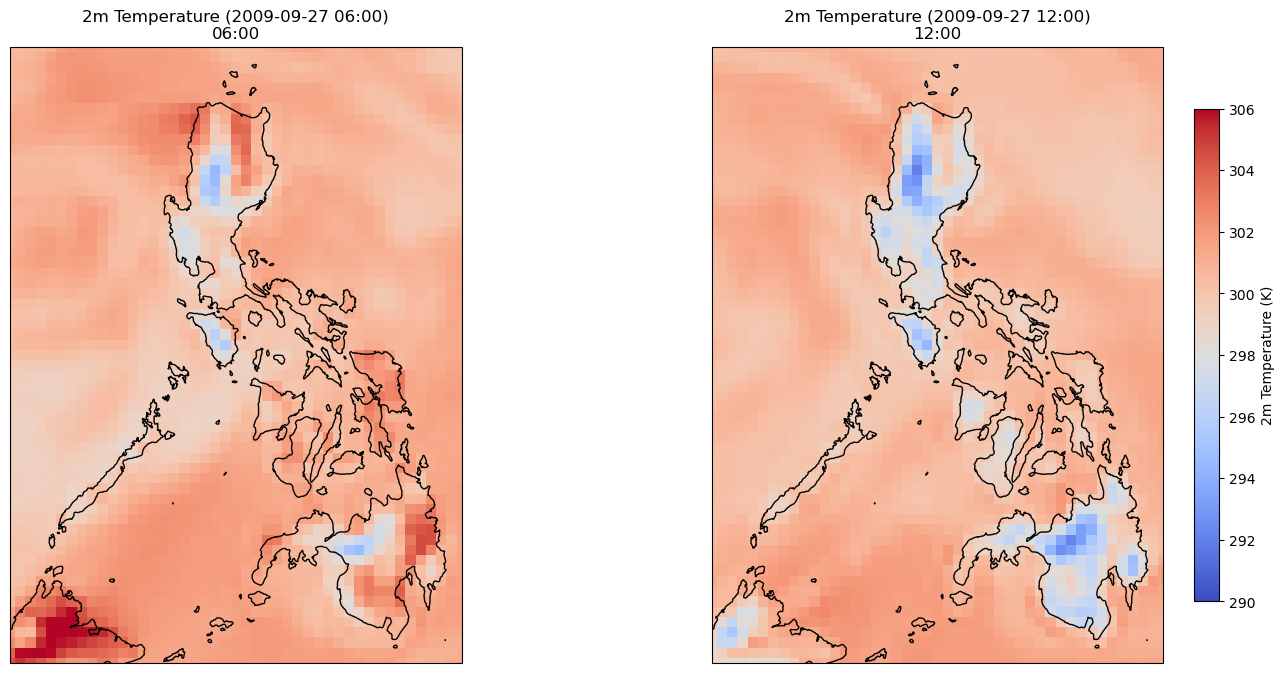

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8), 
                         subplot_kw={'projection': ccrs.PlateCarree()})

indices = [1, 2]
titles = ['06:00', '12:00']

for ax, i, title in zip(axes, indices, titles):
    t2m_slice = data['t2m'][i]
    time = data['valid_time'][i].values
    time_str = pd.to_datetime(time).strftime('%Y-%m-%d %H:%M')

    ax.set_extent([116, 127, 20, 5], crs=ccrs.PlateCarree())
    ax.coastlines(resolution="10m", linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    temp = ax.pcolormesh(data['longitude'], data['latitude'], t2m_slice,
                       cmap='coolwarm', shading='auto', 
                       transform=ccrs.PlateCarree(),
                       vmin=290, vmax=306)

    # Title with actual time
    ax.set_title(f"2m Temperature ({time_str})\n{title}", fontsize=12)

# Add a single colorbar for both plots
fig.colorbar(temp, ax=axes, orientation='vertical', pad=0.02, 
             label='2m Temperature (K)', shrink=0.8)
plt.show()

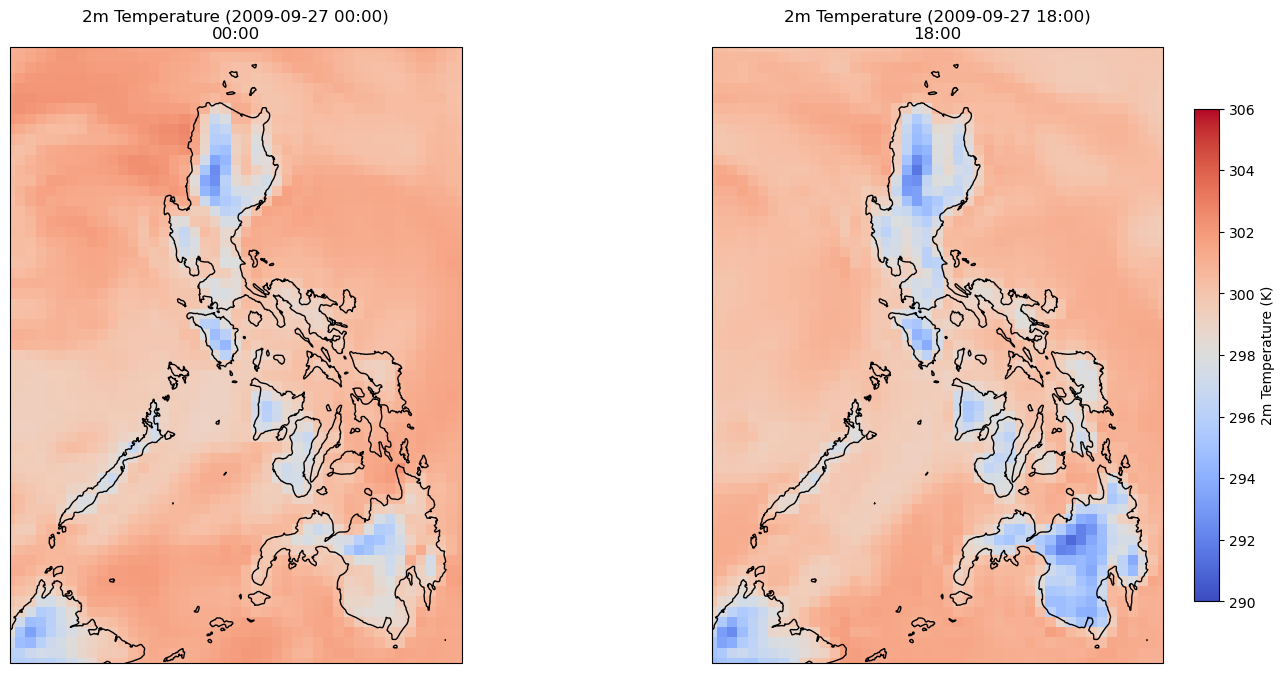

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8), 
                         subplot_kw={'projection': ccrs.PlateCarree()})

indices = [0, 3]
titles = ['00:00', '18:00']

for ax, i, title in zip(axes, indices, titles):
    t2m_slice = data['t2m'][i]
    time = data['valid_time'][i].values
    time_str = pd.to_datetime(time).strftime('%Y-%m-%d %H:%M')

    ax.set_extent([116, 127, 20, 5], crs=ccrs.PlateCarree())
    ax.coastlines(resolution="10m", linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    temp = ax.pcolormesh(data['longitude'], data['latitude'], t2m_slice,
                       cmap='coolwarm', shading='auto', 
                       transform=ccrs.PlateCarree(),
                       vmin=290, vmax=306)

    # Title with actual time
    ax.set_title(f"2m Temperature ({time_str})\n{title}", fontsize=12)

# Add a single colorbar for both plots
fig.colorbar(temp, ax=axes, orientation='vertical', pad=0.02, 
             label='2m Temperature (K)', shrink=0.8)
plt.show()

#### Questions

1. For the same timestep (`i=0` or `valid_time='2009-09-27 00:00`') compare the temperature statistics you calculated for sliced data (Task 3) and for the whole region (Task 2). Explain why the values are different.
2. Repeat the plots for either `i=3` or `valid_time='2009-09-27 12:00'` for the same latitude and longitude slices. Compare and contrast the different maps. What could be the reason for the difference in temperatures for the two timesteps?

1. For `i=0` lower temperatures overall are observed. This is most likely due to the different regions compared (Philippines + WPAC in Task 2 vs Philippines only in Task 3).
2. `i=3` exhibits cooler temperatures across the country compared to `valid_time='2009-09-27 12:00`. The difference in temperatures is likely due to diurnal heating also.

---

### Task 4: Plotting `tp` (Total Precipitation)

Now that you’ve explored the `t2m` (2-meter temperature) variable, let’s try visualizing total precipitation (`tp`) over the Philippines. This exercise will test your ability to adapt code, interpret data, and customize plots as needed.

1. Adapt the Scripts Above: Modify the code from Task 3 to work with the `tp` variable instead of `t2m`. Make sure to:
    - Access the `tp` variable in the dataset.
    - Define your region of interest
    - Calculate descriptive statistics such as the mean, minimum, and maximum for `tp`.
    - Use two cells to plot two time slices of `tp` to show the spatial distribution of precipitation.
2. Customization
   - Adjust [color maps](https://matplotlib.org/stable/users/explain/colors/colormaps.html) as needed.
   - Update the title, color bar label, units
   - Don't forget to update vmin, vmax of `ax.pcolormesh` as needed
3. Hints:
   - Remember that `tp` represents total precipitation, so the units and values may differ significantly from temperature.
   - Use the [ERA5 data documentation](https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation) if you need clarification on the meaning of this variable.
   - Use as many cells as you can.

In [9]:
# Access the 'tp' variable for index i
tp_slice = data['tp'] * 1000
time =  data['valid_time'][1].values
time_str = pd.to_datetime(time).strftime('%Y-%m-%d %H:%M')

# Calculate descriptive statistics
mean_tp = tp_slice.mean().values
min_tp = tp_slice.min().values
max_tp =  tp_slice.max().values

print(f"Mean Total Precipitation: {mean_tp:.2f} mm")
print(f"Min Total Precipitation: {min_tp:.2f} mm")
print(f"Max Total Precipitation: {max_tp:.2f} mm")

Mean Total Precipitation: 0.43 mm
Min Total Precipitation: 0.00 mm
Max Total Precipitation: 26.70 mm


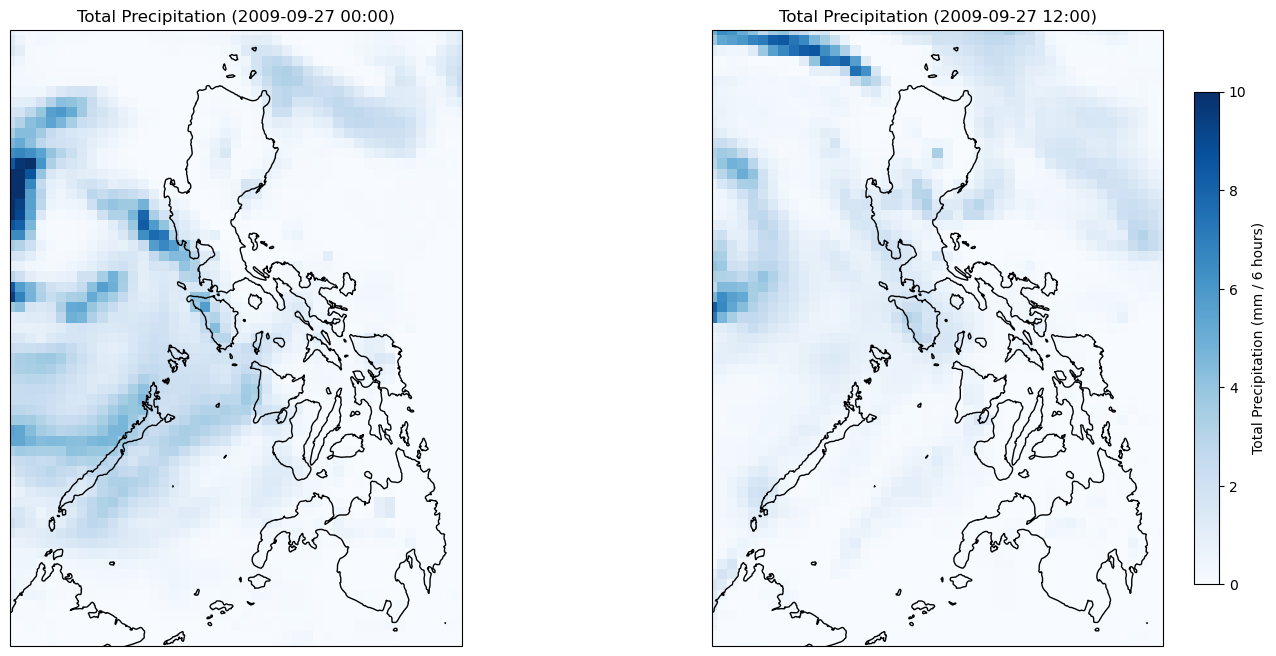

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8),
                         subplot_kw={'projection': ccrs.PlateCarree()})

indices = [0, 2] 

for ax, i in zip(axes, indices):
    tp_slice = data['tp'][i] * 1000 
    time = data['valid_time'][i].values
    time_str = pd.to_datetime(time).strftime('%Y-%m-%d %H:%M')
    
    ax.set_extent([116, 127, 5, 20], crs=ccrs.PlateCarree())    
    ax.coastlines(resolution="10m", linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    precipitation_plot = ax.pcolormesh(data['longitude'], data['latitude'], tp_slice, 
                                 cmap='Blues', shading='auto', transform=ccrs.PlateCarree(),
                                 vmin=0, vmax=10)
    ax.set_title(f"Total Precipitation ({time_str})", fontsize=12)
    
fig.colorbar(precipitation_plot, ax=axes, orientation='vertical', pad=0.02,
             label='Total Precipitation (mm / 6 hours)', shrink=0.8)
plt.show()

#### Questions:
1. What are the mean, minimum, and maximum values for precipitation (`tp`) for your selected region?
2. How does precipitation vary across the Philippines in this time slice?
3. How does the distribution of `tp` differ from `t2m`?

1. 
   - Mean Total Precipitation: 0.43 mm
   - Min Total Precipitation: 0.00 mm
   - Max Total Precipitation: 26.70 mm
2. Precipitation decreases across the Philippines, especially in the northwestern - western section that seems to be most affected by rainfall.
3. The distribution is more localized.

---
### Task 5. Visualizing Wind Speed and Direction during a Tropical Cyclone

In this task, you will visualize the near-surface wind field associated with a tropical cyclone event (e.g., Tropical Storm Ondoy).
You’ll use the ERA5 variables `u10` and `v10`, which represent the zonal (east-west) and meridional (north-south) components of the 10-meter wind.

#### Steps
1. Open the dataset and extract the u10 and v10 variables.
2. Select a time index using isel(valid_time=ts) where ts can be 0, 1, 2, or 3.
3. Compute the wind speed magnitude as:
```python
uv = np.sqrt(u10_slice**2 + v10_slice**2)
```
5. Create a map plot showing:
    - The wind speed (uv) as a color field (using `pcolormesh`)
    - Wind barbs to indicate direction and strength (`plt.barbs`)
6. Repeat the plot for four consecutive timesteps (`ts = 0, 1, 2, 3`).

Initial scripts are provided below

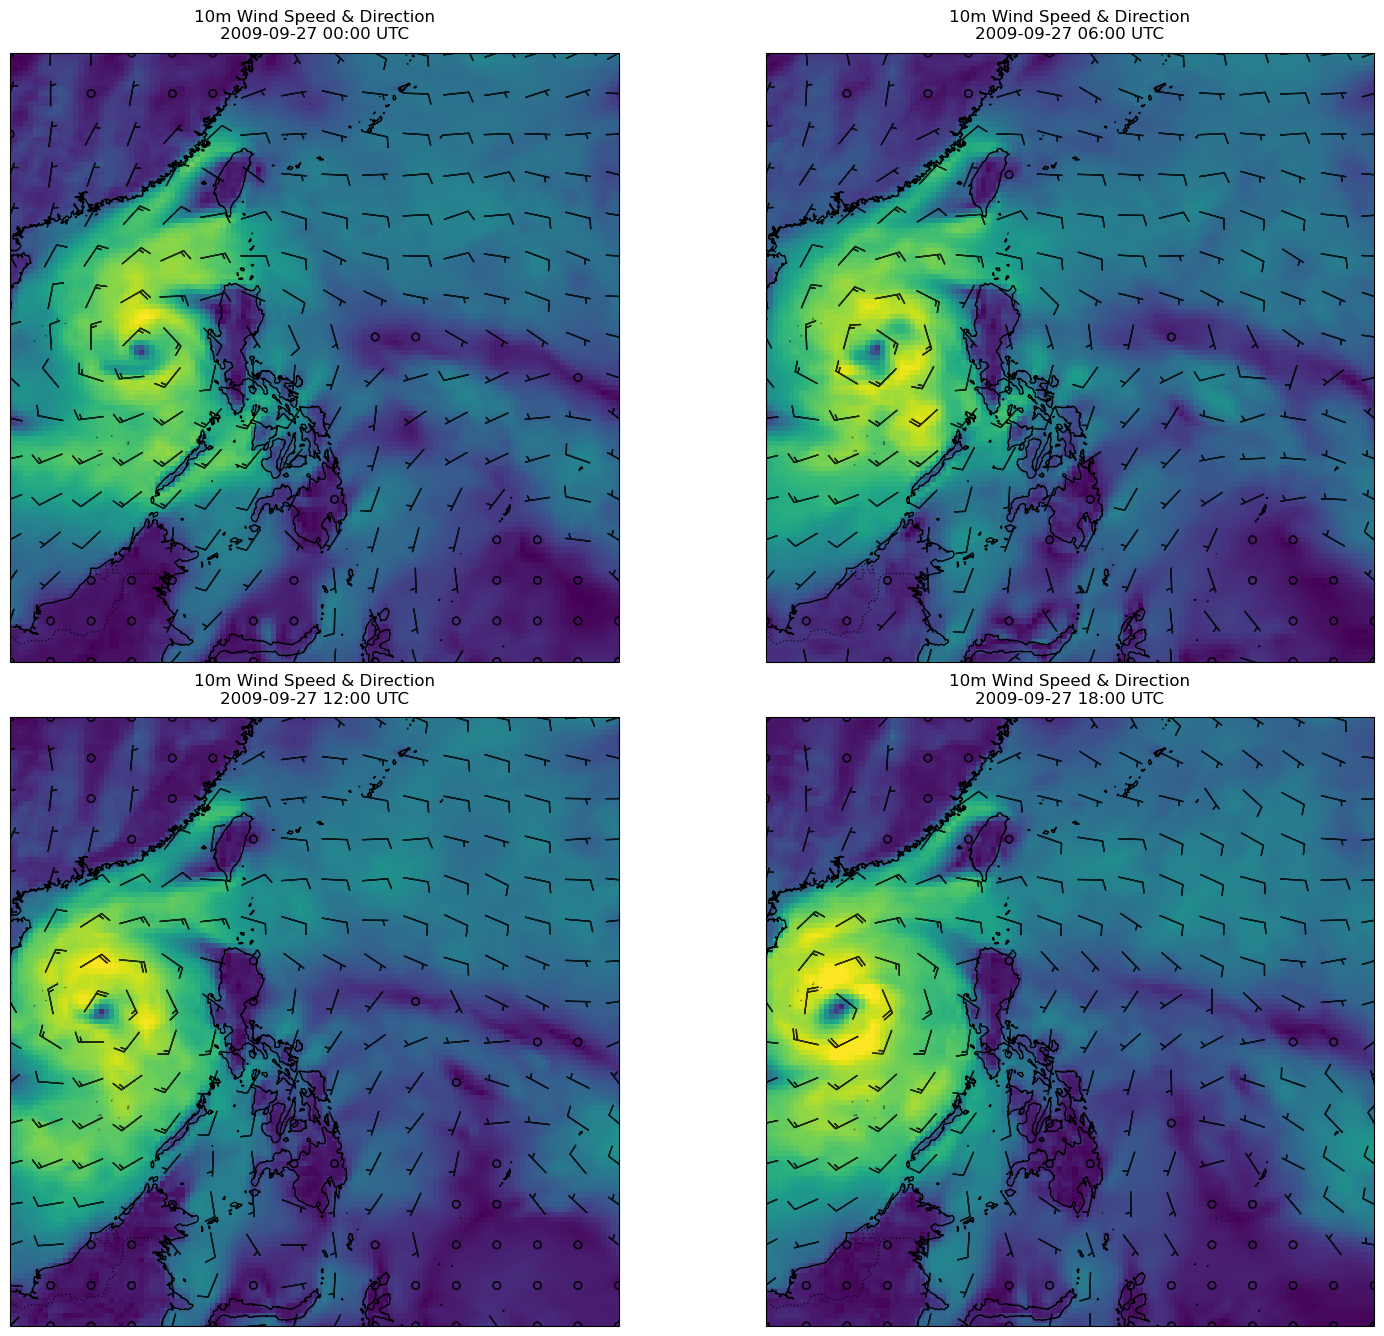

In [12]:
time_step = [0, 1, 2, 3]

fig, axes = plt.subplots(2, 2, figsize=(16, 14),
                         subplot_kw={'projection': ccrs.PlateCarree()})

axes = axes.flatten()

for ax, ts in zip(axes, time_step):
    u10_slice = data['u10'].isel(valid_time=ts)
    v10_slice = data['v10'].isel(valid_time=ts)
    
    wind_speed = np.sqrt(u10_slice**2 + v10_slice**2)
    
    time_val = data['valid_time'].isel(valid_time=ts).values
    time_str = pd.to_datetime(time_val).strftime('%Y-%m-%d %H:%M UTC')

    ax.set_extent([110, 140, 0, 30], crs=ccrs.PlateCarree())

    ax.coastlines(resolution="10m", linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':', alpha=0.7)

    wind = ax.pcolormesh(data['longitude'], data['latitude'], wind_speed,
                       cmap='viridis', shading='auto', transform=ccrs.PlateCarree(),
                       vmin=0, vmax=20)

    skip = 8
    ax.barbs(data['longitude'][::skip], data['latitude'][::skip],
             u10_slice[::skip, ::skip].values,
             v10_slice[::skip, ::skip].values,
             length=6, pivot='middle', transform=ccrs.PlateCarree(),
             color='black', alpha=0.8)

    ax.set_title(f'10m Wind Speed & Direction\n{time_str}', fontsize=12, pad=10)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

#### Questions

1. How does the wind field evolve as the tropical cyclone moves or intensifies?
2. Where do the strongest winds occur, and how do they relate spatially to heaviest rainfall areas in Task 4?
3. Can you identify the approximate storm center based on the wind direction pattern?

1. The wind field follows the center of the tropical cyclone as it moves.
2. The strongest winds occur closest to the eye/right around it, and these areas are where heaviest rainfall are also observed.
3. The center of the storm is approximately at the convergence of the wind barbs, drawing from the top of the barbs inward.

---

### Final Questions
1. What did you notice about the structure of the ERA5 NetCDF file in terms of its dimensions (time, latitude, longitude) and available variables?How do these dimensions relate to the physical meaning of the data?
2. How did changing the timestep (valid_time) affect the spatial distribution of temperature, precipitation, and winds? What patterns or temporal variations stood out?
3. When you subset the data by location, what differences did you observe compared to the full domain? What does this tell you about the importance of spatial resolution and extent in interpreting atmospheric datasets?
4. How are wind patterns related to precipitation and temperature fields in your plots?
5. What steps were needed to go from a raw NetCDF file to a meaningful scientific visualization?
6. What challenges did you encounter, and how would you approach similar datasets in future analyses?


1. The values within the ERA5 NetCDF file are organized according to their temporal and spatial dimensions. This shows how the variables represented in the dataset change in space and time.
2. Changing the timestep showed different values for all three variables.
   - Temperature: Changes in temperature showed diurnal heating over the country.
   - Precipitation: Changes in precipitation showed areas with intense rainfall and how they moved away from the country.
   - Winds: Changes in winds showed the wind field of a storm and how it intensified as it moved away from the country.
3. When the dataset was subset by location, the data presented were finer/shown in higher resolution compared to the full domain, highlighting local and regional differences. Spatial resolution is important when considering the behavior or phenomena that will be studied, and what outcomes are expected to be visualized.
4. Wind patterns are closely related to precipitation and temperature. For precipitation especially, the wind field shown in my wind plots are directly related to areas that received high amounts of precipitation.
5. The raw NetCDF file must be inspected first for its variables and metadata. Next, the data must be processed depending on the user's needs; this includes subsetting or clipping to show only certain regions, or splicing timesteps to show the temporal evolution of the variable(s).
6. Correcting variables and their extent was challenging to me. In the future, I would take care to remember how certain variables should be processed and visualized correctly.